In [1]:
#Required Packages

import pandas as pd                                  # For importing data from csv file
import numpy as np                                   # For mathematical calculations
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt                      # For data visualization

In [2]:
# Fetching the data set

df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
df_length = len(df)
df_length

614

In [4]:
test_col = len(test.columns)
test_col

11

In [5]:
# It provides description about our dataset

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [7]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [8]:
#Identifying total number of loans approved

loan_approval = df['Loan_Status'].value_counts()['Y']
print (loan_approval)

422


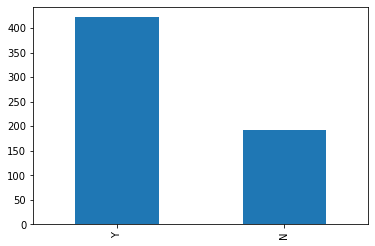

In [9]:
#Bar plot to visualize the frequency

df['Loan_Status'].value_counts().plot.bar()

In [10]:
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [11]:
# Check for missing values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

In [12]:
#Replace missing values with the mode

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

df['Married'].fillna(df['Married'].mode()[0], inplace=True)

df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y


In [14]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Loan_Status           0
dtype: int64

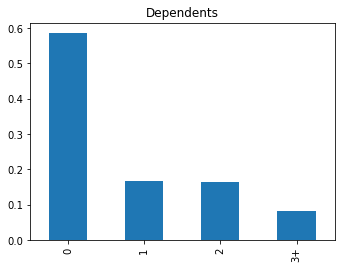

In [15]:
#Visualize remaining categorical features

#There is one categorical feature which is quarternary

plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title='Dependents')

plt.show()

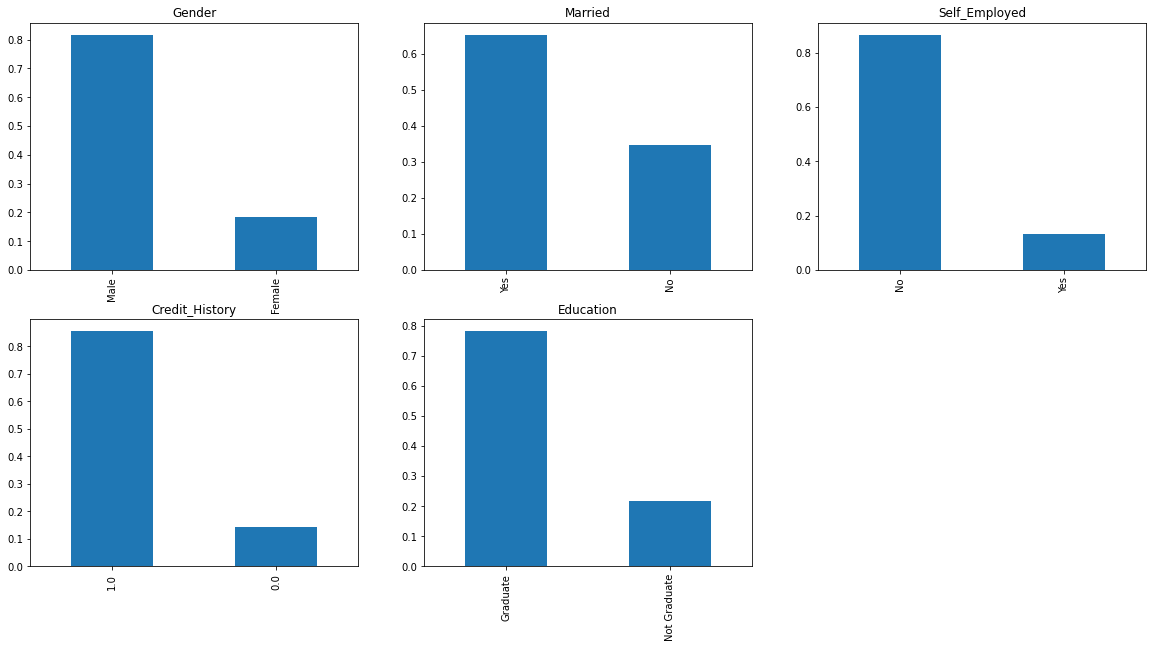

In [16]:
#There are 5 featueres which are either categorical or binary
#(Gender,Married,Self_Employed, Credit_History, Education)

#Visualize remaining categorical features
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot(kind="bar", figsize=(20,10), title='Gender', stacked=True)

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.show()

In [17]:
#Value count of the loan amount term variable 

df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [18]:
#Replace missing values with the median due to outliers

df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [19]:
#Check whether all missing values are filled in the train dataset

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

In [20]:
#Replace missing values in test dataset with the mode/median as done in Training dataset

test['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

test['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

test['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

test['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

test['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

test['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [21]:
#Check whether all missing values are filled in the test dataset

test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [22]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


In [23]:
#Frequency table of a variable will give us the count of each category in that variable

df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
# Identifying total percentage of applicants whose loan is approved

def percentageconvert(ser):
    return ser/float(ser[-1])

df2 = pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True).apply(percentageconvert, axis=1)
approval_with_credit_1 = df2['Y'][1]
print (approval_with_credit_1)

print (approval_with_credit_1*100)

0.7904761904761904
79.04761904761905


In [25]:
df2.head()

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.209524,0.790476,1.0
All,0.312704,0.687296,1.0


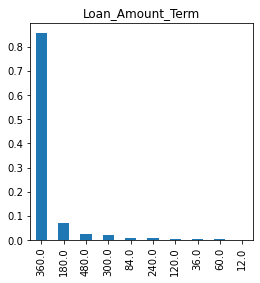

In [26]:
#Plot bar chart

df['Loan_Amount_Term'].value_counts(normalize=True).plot(kind='bar', title= 'Loan_Amount_Term', stacked=True, figsize=(4,4))

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


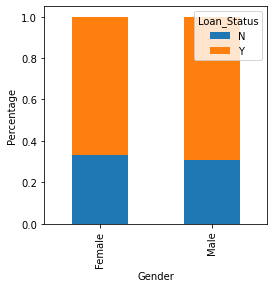

In [28]:
print (pd.crosstab(df['Gender'], df['Loan_Status']))

Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288


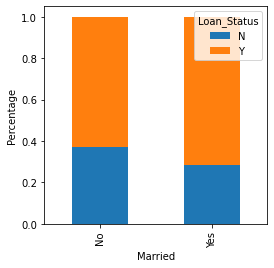

In [29]:
print (pd.crosstab(df['Married'], df['Loan_Status']))

Gender = pd.crosstab(df['Married'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33


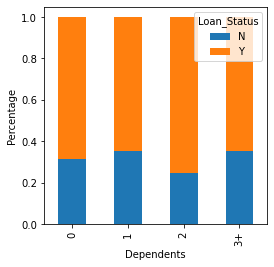

In [30]:
print (pd.crosstab(df['Dependents'], df['Loan_Status']))

Gender = pd.crosstab(df['Dependents'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


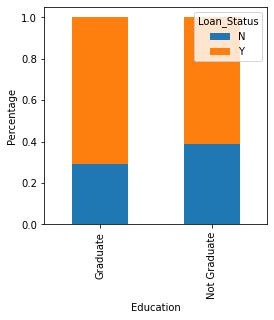

In [31]:
print (pd.crosstab(df['Education'], df['Loan_Status']))

Gender = pd.crosstab(df['Education'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


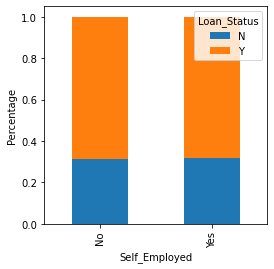

In [32]:
print (pd.crosstab(df['Self_Employed'], df['Loan_Status']))

Gender = pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

In [33]:
# Drop Loan_Id

df = df.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [41]:
# Drop 'Loan_Status' and assign it to the target variable

X = df.drop('Loan_Status', 1)
y = df.Loan_Status

In [42]:
def tran_gender(x):
    if x=="Male":
        return 1
    if x=="Female":
        return 0

In [43]:
df['Tran_Gender'] = df['Gender'].apply(tran_gender)

In [44]:
def tran_education(x):
    if x=="Graduate":
        return 1
    if x=="Not Graduate":
        return 0

In [45]:
df['Tran_Education'] = df['Education'].apply(tran_education)

In [46]:
#Adding dummies to the dataset

X = pd.get_dummies(X)
train = pd.get_dummies(df)
test = pd.get_dummies(test)

In [47]:
#Import library 

from sklearn.model_selection import train_test_split
import seaborn as sns

In [48]:
#Split the model into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
# Dimension of the data
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((429, 19), (185, 19), (429,), (185,))

In [51]:
#Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [52]:
#Fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [53]:
# Make prediction
pred_cv = model.predict(x_cv)
pred_cv

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [54]:
#Predict the loan status for validation set and calculate its accuracy
#Calculate accuracy score

accuracy_score(y_cv, pred_cv)

0.8324324324324325

[[ 22  29]
 [  2 132]]


Text(33.0, 0.5, 'True')

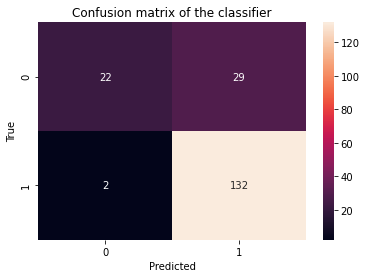

In [55]:
#Evaluation of model with confusion matrix
#Import confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_cv, pred_cv)
print(cm)

sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')